Marketing Campaign Data Analysis

In this project, I will do some basic cleaning and analyzing of marketing data from a brick and mortar business. The store sells various food and drink items and take orders in-store, on the web, and through catalogs. I will be cleaning the data, finding the most popular products, and finding which method of purchase is most utilized.

First let's load the data and take a look.

In [1]:
import pandas as pd
import numpy as np
marketing = pd.read_csv("/Users/inezleon/Desktop/marketing_campaign.csv", sep=";")
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Let's delete uneccessary columns and rename some columns.

In [2]:
marketing = marketing.drop(["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response", "MntGoldProds"], axis=1)


In [3]:
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,546,172,88,3,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,2,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,127,111,21,1,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,20,10,3,2,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,118,46,27,5,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,182,42,118,2,9,3,4,5,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,30,0,0,7,8,2,5,7,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,217,32,12,1,2,3,13,6,3,11
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,214,80,30,2,6,5,10,3,3,11


In [4]:
marketing = marketing.rename(columns = {'Year_Birth':'YearBirth',
                            'Marital_Status':'MaritalStatus',
                            'Kidhome':'KidHome',
                            'Teenhome':'TeenHome',
                            'Dt_Customer':'DtCustomer',
                            'Z_CostContact':'ZCostContact',
                            'Z_Revenue':'ZRevenue',
                            'MntWines':'Wines',
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'MeatProducts',
                            'MntFishProducts':'FishProducts',
                            'MntSweetProducts':'SweetProducts'})


In [5]:
marketing

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,Wines,...,MeatProducts,FishProducts,SweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ZCostContact,ZRevenue
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,546,172,88,3,8,10,4,7,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,2,1,1,2,5,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,127,111,21,1,8,2,10,4,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,20,10,3,2,2,0,4,6,3,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,118,46,27,5,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,182,42,118,2,9,3,4,5,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,30,0,0,7,8,2,5,7,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,217,32,12,1,2,3,13,6,3,11
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,214,80,30,2,6,5,10,3,3,11


Next let's check for nulls.

In [6]:
marketing.isna().any()

ID                     False
YearBirth              False
Education              False
MaritalStatus          False
Income                  True
KidHome                False
TeenHome               False
DtCustomer             False
Recency                False
Wines                  False
Fruits                 False
MeatProducts           False
FishProducts           False
SweetProducts          False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
ZCostContact           False
ZRevenue               False
dtype: bool

There are nulls in the 'Income' column. Let's see how many.

In [7]:
marketing.Income.isna().sum()

24

These 24 people chose to not disclose their income which is fine. Let's just fill those missing income values with the average income based on education. To do this we will use a for loop and create a filter.

In [8]:
unique_Education = pd.unique(marketing.Education)
temp_data = marketing.copy()
columns = ['Income']
for c in unique_Education:
    education_filter = temp_data.Education == c
    filtered_data = temp_data[education_filter]
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]),2)
        if ~np.isnan(mean):
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Missing value in {s} column fill with {mean} when education:{c}")
        else:
            all_data_mean = np.round(np.mean(marketing[s]),2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing value in {s} column fill with {all_data_mean}")
    temp_data[education_filter] = filtered_data
                
marketing = temp_data.copy()

Missing value in Income column fill with 52720.37 when education:Graduation
Missing value in Income column fill with 56145.31 when education:PhD
Missing value in Income column fill with 52917.53 when education:Master
Missing value in Income column fill with 20306.26 when education:Basic
Missing value in Income column fill with 47633.19 when education:2n Cycle


/var/folders/rk/rxbbys895wn2qpw7t8xg5tjr0000gn/T/ipykernel_20463/1981817513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[s] = filtered_data[s].fillna(mean)


Let's now check if there are still any nulls.

In [9]:
marketing.isnull().sum()

ID                     0
YearBirth              0
Education              0
MaritalStatus          0
Income                 0
KidHome                0
TeenHome               0
DtCustomer             0
Recency                0
Wines                  0
Fruits                 0
MeatProducts           0
FishProducts           0
SweetProducts          0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
ZCostContact           0
ZRevenue               0
dtype: int64

There aren't!

Let's create an 'Age' column which would be an easier value to interpret than the year of birth. We will later use this column to create age brackets. Categorizing a column with a continuous range of numbers will make it easier to visualize.

In [10]:
marketing['Age'] = 2023 - marketing['YearBirth']
print(marketing.describe())

                 ID    YearBirth         Income      KidHome     TeenHome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52253.592339     0.444196     0.506250   
std     3246.662198    11.984069   25039.085599     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51609.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency        Wines       Fruits  MeatProducts  FishProducts  \
count  2240.000000  2240.000000  2240.000000   2240.000000   2240.000000   
mean     49.109375   303.935714    26.302232    166.950000     37.525446   
std      28.962453   336.597393    39.773434    225.715373     54.628979   
mi

To start analyzing, let's get a visualization comparing the revenue from all sold products.

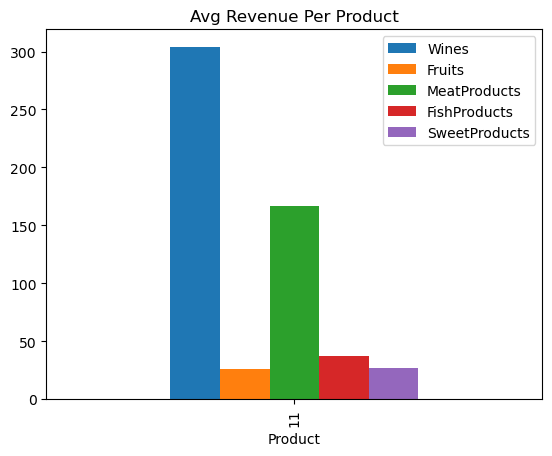

In [11]:
from matplotlib import pyplot as plt
avg_revenue_per_product = marketing.groupby("ZRevenue")[["Wines","Fruits","MeatProducts","FishProducts","SweetProducts"]].mean()
avg_revenue_per_product.plot(kind="bar")
plt.title("Avg Revenue Per Product")
plt.xlabel("Product")
plt.show()



It seems that wine and meat are the top sold products. The store can now stock and market products accordingly. They can create displays and targeted sales on busy days for those produts and/or highlight meat and wine on their online store and in catalogs compared to other products.

Let's start to analyze customers' income. Below is the distribution of income levels compared to one another.

Text(0, 0.5, 'Number of Customers')

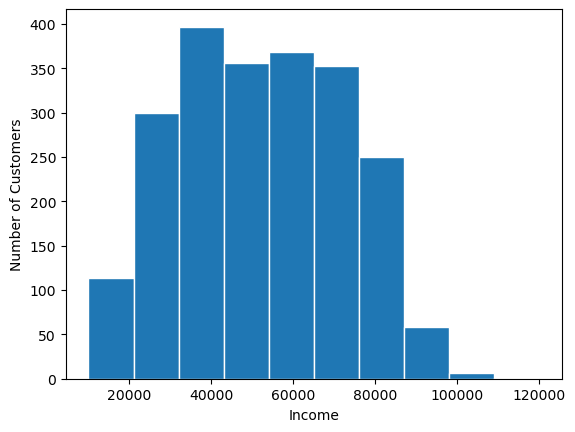

In [12]:
plt.hist(marketing.Income, range=(10000,120000), edgecolor="white")
plt.xlabel('Income')
plt.ylabel('Number of Customers')


Let's now compare income levels with the different methods of purchase.

As we did earlier, we will create a new column with brackets to more easily visualize the data from the 'Income' column which has continuous numerical values. First we will convert the 'Income' column into a list.

In [13]:
incomes = marketing['Income'].tolist()


In [14]:
incomes

[58138.0,
 46344.0,
 71613.0,
 26646.0,
 58293.0,
 62513.0,
 55635.0,
 33454.0,
 30351.0,
 5648.0,
 52720.37,
 7500.0,
 63033.0,
 59354.0,
 17323.0,
 82800.0,
 41850.0,
 37760.0,
 76995.0,
 33812.0,
 37040.0,
 2447.0,
 58607.0,
 65324.0,
 40689.0,
 18589.0,
 53359.0,
 52720.37,
 38360.0,
 84618.0,
 10979.0,
 38620.0,
 40548.0,
 46610.0,
 68657.0,
 49389.0,
 67353.0,
 23718.0,
 42429.0,
 48948.0,
 80011.0,
 20559.0,
 21994.0,
 56145.31,
 7500.0,
 79941.0,
 7500.0,
 41728.0,
 52720.37,
 72550.0,
 65486.0,
 79143.0,
 35790.0,
 82582.0,
 66373.0,
 82384.0,
 70287.0,
 27938.0,
 52720.37,
 55954.0,
 75777.0,
 66653.0,
 61823.0,
 67680.0,
 70666.0,
 25721.0,
 32474.0,
 88194.0,
 69096.0,
 74854.0,
 66991.0,
 47633.19,
 65031.0,
 60631.0,
 28332.0,
 40246.0,
 75251.0,
 75825.0,
 26326.0,
 56046.0,
 29760.0,
 26304.0,
 23559.0,
 38620.0,
 81361.0,
 29440.0,
 36138.0,
 50388.0,
 79593.0,
 54178.0,
 56145.31,
 52720.37,
 52917.53,
 42394.0,
 23626.0,
 30096.0,
 47916.0,
 51813.0,
 78497.0,
 50150

Now we will create the brackets with a for loop. I did it by intervals of $10,000.

In [15]:
income_level = []
for i in incomes:
    if i <= 30000:
        income_level.append('30k and under')
    elif (i > 30000) & (i <= 40000):
        income_level.append('30k to 40k')
    elif (i >40000) & (i <=50000):
        income_level.append('40k to 50k')
    elif (i >50000) & (i <=60000):
        income_level.append('50k to 60k')
    elif (i >60000) & (i <=70000):
        income_level.append('60k to 70k')
    elif (i >70000) & (i <=80000):
        income_level.append('70k to 80k')
    elif (i >80000) & (i <=90000):
        income_level.append('80k to 90k')
    elif (i >90000) & (i <=100000):
        income_level.append('90k to 100k')
    else:
        income_level.append('over 100k')

Let's check to see if the new column displays the string values we assigned it.

In [16]:
income_level

['50k to 60k',
 '40k to 50k',
 '70k to 80k',
 '30k and under',
 '50k to 60k',
 '60k to 70k',
 '50k to 60k',
 '30k to 40k',
 '30k to 40k',
 '30k and under',
 '50k to 60k',
 '30k and under',
 '60k to 70k',
 '50k to 60k',
 '30k and under',
 '80k to 90k',
 '40k to 50k',
 '30k to 40k',
 '70k to 80k',
 '30k to 40k',
 '30k to 40k',
 '30k and under',
 '50k to 60k',
 '60k to 70k',
 '40k to 50k',
 '30k and under',
 '50k to 60k',
 '50k to 60k',
 '30k to 40k',
 '80k to 90k',
 '30k and under',
 '30k to 40k',
 '40k to 50k',
 '40k to 50k',
 '60k to 70k',
 '40k to 50k',
 '60k to 70k',
 '30k and under',
 '40k to 50k',
 '40k to 50k',
 '80k to 90k',
 '30k and under',
 '30k and under',
 '50k to 60k',
 '30k and under',
 '70k to 80k',
 '30k and under',
 '40k to 50k',
 '50k to 60k',
 '70k to 80k',
 '60k to 70k',
 '70k to 80k',
 '30k to 40k',
 '80k to 90k',
 '60k to 70k',
 '80k to 90k',
 '70k to 80k',
 '30k and under',
 '50k to 60k',
 '50k to 60k',
 '70k to 80k',
 '60k to 70k',
 '60k to 70k',
 '60k to 70k',
 

It worked! We can now refer to the 'income_level' column in the data frame.

In [17]:
marketing['income_level'] = income_level

In [18]:
marketing

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,Wines,...,SweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ZCostContact,ZRevenue,Age,income_level
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,3,11,66,50k to 60k
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,1,1,2,5,3,11,69,40k to 50k
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,21,1,8,2,10,4,3,11,58,70k to 80k
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,2,2,0,4,6,3,11,39,30k and under
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,27,5,5,3,6,5,3,11,42,50k to 60k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,118,2,9,3,4,5,3,11,56,60k to 70k
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,7,8,2,5,7,3,11,77,60k to 70k
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,12,1,2,3,13,6,3,11,42,50k to 60k
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,30,2,6,5,10,3,3,11,67,60k to 70k


To visualize this now easily digestible income data to the various methods of purchase (web, catalog, in-store), we will use the .groupby() function to organize the specific data we need into a data frame of its own.

In [19]:
income_group = marketing.groupby('income_level')['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].sum()


/var/folders/rk/rxbbys895wn2qpw7t8xg5tjr0000gn/T/ipykernel_20463/1216586839.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  income_group = marketing.groupby('income_level')['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].sum()


In [20]:
income_group

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
income_level,,,
30k and under,723,177,1051
30k to 40k,848,207,1198
40k to 50k,1212,447,1481
50k to 60k,1739,835,2224
60k to 70k,1959,1340,2798
70k to 80k,1568,1567,2433
80k to 90k,831,1028,1402
90k to 100k,211,249,328
over 100k,59,113,55


To take 'income_level' out of the index, let's reset the index.

In [32]:
income_group = income_group.reset_index()

Now let's grab the column names we're using to they're easy to copy and paste.

In [35]:
income_group.columns

Index(['income_level', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases'],
      dtype='object')

Now let's first see what percentage of total purcahses each method of purchase makes up for each customer. To do this, we will create new columns just for the percentage of each method of purchases as well as a 'total' column for the count of all the customer's purchases.

In [36]:
income_group['total'] = income_group['NumWebPurchases'] + income_group['NumCatalogPurchases'] + income_group['NumStorePurchases']
income_group['pct_web'] = round((income_group['NumWebPurchases']/income_group['total'])*100, 2)
income_group['pct_catalog'] = round((income_group['NumCatalogPurchases']/income_group['total'])*100, 2)
income_group['pct_store'] = round((income_group['NumStorePurchases']/income_group['total'])*100, 2)
income_group


,income_level,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,total,pct_web,pct_catalog,pct_store
0,30k and under,723,177,1051,1951,37.06,9.07,53.87
1,30k to 40k,848,207,1198,2253,37.64,9.19,53.17
2,40k to 50k,1212,447,1481,3140,38.60,14.24,47.17
3,50k to 60k,1739,835,2224,4798,36.24,17.40,46.35
4,60k to 70k,1959,1340,2798,6097,32.13,21.98,45.89
5,70k to 80k,1568,1567,2433,5568,28.16,28.14,43.70
6,80k to 90k,831,1028,1402,3261,25.48,31.52,42.99
7,90k to 100k,211,249,328,788,26.78,31.60,41.62
8,over 100k,59,113,55,227,25.99,49.78,24.23


Let's only use the percentage and 'income_level' columns for this visualization. 

In [37]:
income_group_graph = income_group[['income_level', 'pct_web', 'pct_catalog', 'pct_store']]
income_group_graph

,income_level,pct_web,pct_catalog,pct_store
0,30k and under,37.06,9.07,53.87
1,30k to 40k,37.64,9.19,53.17
2,40k to 50k,38.60,14.24,47.17
3,50k to 60k,36.24,17.40,46.35
4,60k to 70k,32.13,21.98,45.89
5,70k to 80k,28.16,28.14,43.70
6,80k to 90k,25.48,31.52,42.99
7,90k to 100k,26.78,31.60,41.62
8,over 100k,25.99,49.78,24.23


Let's make the 'income_level' column the information by which everything else is organized.

In [38]:
income_group_graph.index = income_group_graph['income_level']
income_group_graph

,income_level,pct_web,pct_catalog,pct_store
income_level,,,,
30k and under,30k and under,37.06,9.07,53.87
30k to 40k,30k to 40k,37.64,9.19,53.17
40k to 50k,40k to 50k,38.60,14.24,47.17
50k to 60k,50k to 60k,36.24,17.40,46.35
60k to 70k,60k to 70k,32.13,21.98,45.89
70k to 80k,70k to 80k,28.16,28.14,43.70
80k to 90k,80k to 90k,25.48,31.52,42.99
90k to 100k,90k to 100k,26.78,31.60,41.62
over 100k,over 100k,25.99,49.78,24.23


Now let's plot the data. I made a bar chart where each income level has a bar for each method of purchase.

<AxesSubplot:xlabel='Income Level', ylabel='Percentage of Purchases'>

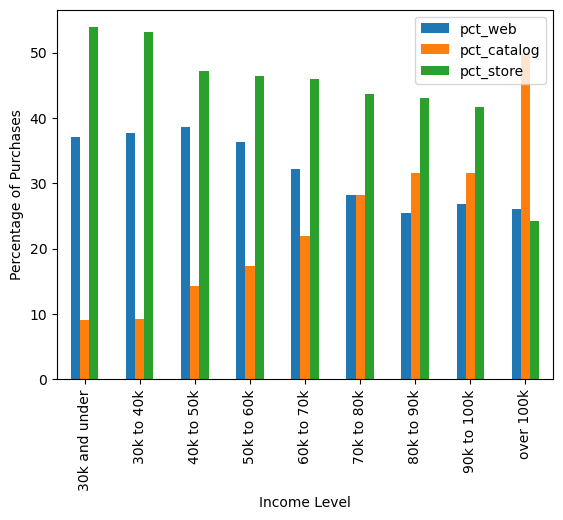

In [42]:
income_group_graph.plot(kind='bar', ylabel = 'Percentage of Purchases', xlabel = 'Income Level')


As income goes up, the percentage of catalog purchases per income group dramatically increase. In-store then web purchases make up most of the purchases of lower income customers. In-store and web purchases are also fairly popular amongst all income levels but slightly decline as the income level increases. Since the store's richest consumers mostly purchase through the catalog, marketing more expensive products via catalog could lead to increased profit. Maybe catalog-only memberships or deals could incentivize that customer group to purchase on a more regular basis. On the flip-side, catering to the frequent lower income customers who choose to mainly shop in-store would also increase profits. Free product samples, surplus products discounted and packaged together as limited time deals, and other methods of marketing can be used to cater to in-store lower income consumers.

Now let's also analyze the actual counts of how many customers there are per income bracket and how many purchases are being made by each method of purchase.

<AxesSubplot:xlabel='income_level'>

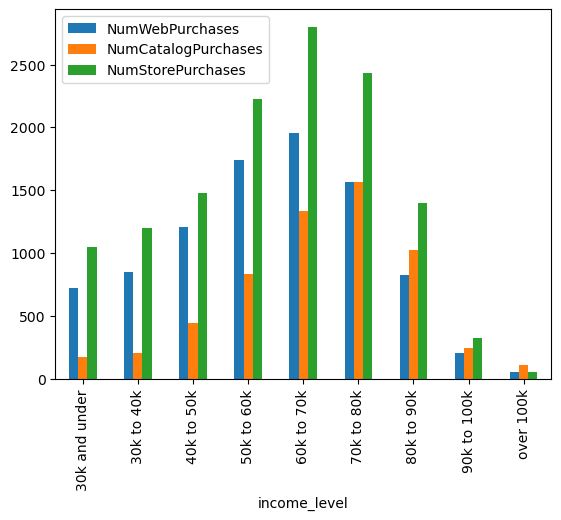

In [21]:
income_group.plot(kind='bar')

We can see that the majority of purchases in total are made in-store across all income levels. To marketing accordinly to the local community, signs, posters, and billboards can be put up to alert the store's largest population of customers when events and sales are occurring or when new products are being released. The main demographic based on income are those who make between 60-70k a year. Second is the 70-80k range and third is the 50-60k range. So basically middle class. Now knowing the incomes of the store's main demographic, prices and quality standards can be set accordingly. 

Let's do the same analysis for the 'Age' column we made and create brackets to more easily visualize the data.

In [22]:
agegroups = marketing['Age'].tolist()


In [23]:
agegroups


[66,
 69,
 58,
 39,
 42,
 56,
 52,
 38,
 49,
 73,
 40,
 47,
 64,
 71,
 36,
 77,
 43,
 77,
 74,
 38,
 41,
 44,
 74,
 69,
 72,
 54,
 47,
 37,
 34,
 58,
 34,
 60,
 53,
 71,
 77,
 72,
 53,
 47,
 50,
 80,
 43,
 38,
 66,
 64,
 48,
 47,
 27,
 55,
 72,
 69,
 66,
 59,
 46,
 46,
 45,
 68,
 57,
 35,
 41,
 55,
 41,
 48,
 71,
 72,
 75,
 52,
 56,
 44,
 65,
 53,
 69,
 50,
 64,
 48,
 71,
 46,
 51,
 47,
 47,
 58,
 38,
 54,
 50,
 60,
 36,
 63,
 53,
 66,
 50,
 56,
 66,
 66,
 50,
 51,
 53,
 40,
 63,
 51,
 72,
 40,
 63,
 64,
 44,
 78,
 64,
 44,
 59,
 54,
 45,
 63,
 44,
 32,
 60,
 32,
 43,
 61,
 53,
 45,
 56,
 54,
 70,
 56,
 38,
 47,
 40,
 58,
 39,
 70,
 62,
 67,
 71,
 65,
 54,
 60,
 59,
 56,
 47,
 64,
 50,
 58,
 31,
 47,
 61,
 49,
 35,
 47,
 48,
 42,
 50,
 57,
 70,
 54,
 51,
 35,
 71,
 74,
 65,
 45,
 46,
 68,
 65,
 78,
 39,
 48,
 50,
 57,
 70,
 64,
 35,
 66,
 58,
 41,
 53,
 64,
 56,
 48,
 75,
 53,
 64,
 72,
 47,
 35,
 77,
 39,
 62,
 40,
 53,
 57,
 47,
 59,
 45,
 34,
 123,
 35,
 50,
 46,
 43,
 69,
 69,
 50,

I organized the brackets by intervals of ten years.

In [24]:
age_groups = []
for a in agegroups:
    if a <= 20:
        age_groups.append('20 and younger')
    elif (a >=21) & (a <= 30):
        age_groups.append('20 to 30')
    elif (a >=31) & (a <= 40):
        age_groups.append('30 to 40')
    elif (a >=41) & (a <= 50):
        age_groups.append('40 to 50')
    elif (a >=51) & (a <= 60):
        age_groups.append('50 to 60')
    elif (a >=61) & (a <= 70):
        age_groups.append('60 to 70')
    elif a >=71:
        age_groups.append('over 70')

The column is called 'age_groups'.

In [25]:
marketing['age_groups'] = age_groups

In [26]:
age_groups

['60 to 70',
 '60 to 70',
 '50 to 60',
 '30 to 40',
 '40 to 50',
 '50 to 60',
 '50 to 60',
 '30 to 40',
 '40 to 50',
 'over 70',
 '30 to 40',
 '40 to 50',
 '60 to 70',
 'over 70',
 '30 to 40',
 'over 70',
 '40 to 50',
 'over 70',
 'over 70',
 '30 to 40',
 '40 to 50',
 '40 to 50',
 'over 70',
 '60 to 70',
 'over 70',
 '50 to 60',
 '40 to 50',
 '30 to 40',
 '30 to 40',
 '50 to 60',
 '30 to 40',
 '50 to 60',
 '50 to 60',
 'over 70',
 'over 70',
 'over 70',
 '50 to 60',
 '40 to 50',
 '40 to 50',
 'over 70',
 '40 to 50',
 '30 to 40',
 '60 to 70',
 '60 to 70',
 '40 to 50',
 '40 to 50',
 '20 to 30',
 '50 to 60',
 'over 70',
 '60 to 70',
 '60 to 70',
 '50 to 60',
 '40 to 50',
 '40 to 50',
 '40 to 50',
 '60 to 70',
 '50 to 60',
 '30 to 40',
 '40 to 50',
 '50 to 60',
 '40 to 50',
 '40 to 50',
 'over 70',
 'over 70',
 'over 70',
 '50 to 60',
 '50 to 60',
 '40 to 50',
 '60 to 70',
 '50 to 60',
 '60 to 70',
 '40 to 50',
 '60 to 70',
 '40 to 50',
 'over 70',
 '40 to 50',
 '50 to 60',
 '40 to 50',
 '

Let's check to see that it shows up in the main data frame.

In [27]:
marketing

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,Wines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ZCostContact,ZRevenue,Age,income_level,age_groups
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,3,11,66,50k to 60k,60 to 70
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,3,11,69,40k to 50k,60 to 70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,3,11,58,70k to 80k,50 to 60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,3,11,39,30k and under,30 to 40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,3,11,42,50k to 60k,40 to 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,2,9,3,4,5,3,11,56,60k to 70k,50 to 60
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,8,2,5,7,3,11,77,60k to 70k,over 70
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,2,3,13,6,3,11,42,50k to 60k,40 to 50
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,2,6,5,10,3,3,11,67,60k to 70k,60 to 70


It does! Now, as before, we will zoom in on the data necessary for our plot, reset the index, and create percentage columns so we may analyze those in addition to the actual counts of each age category.

In [28]:
age_graph = marketing.groupby('age_groups')['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].sum()


/var/folders/rk/rxbbys895wn2qpw7t8xg5tjr0000gn/T/ipykernel_20463/2254186185.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_graph = marketing.groupby('age_groups')['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].sum()


In [29]:
age_graph

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
age_groups,,,
20 to 30,55,73,98
30 to 40,937,626,1480
40 to 50,2363,1421,3317
50 to 60,2627,1572,3563
60 to 70,2090,1471,2963
over 70,1078,800,1549


In [46]:
age_graph = age_graph.reset_index()

In [47]:
age_graph

,level_0,index,age_groups,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,0,20 to 30,55,73,98
1,1,1,30 to 40,937,626,1480
2,2,2,40 to 50,2363,1421,3317
3,3,3,50 to 60,2627,1572,3563
4,4,4,60 to 70,2090,1471,2963
5,5,5,over 70,1078,800,1549


In [48]:
age_graph.columns

Index(['level_0', 'index', 'age_groups', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'],
      dtype='object')

In [49]:
age_graph['total'] = age_graph['NumWebPurchases'] + age_graph['NumCatalogPurchases'] + age_graph['NumStorePurchases']
age_graph['pct_web'] = round((age_graph['NumWebPurchases']/age_graph['total'])*100, 2)
age_graph['pct_catalog'] = round((age_graph['NumCatalogPurchases']/age_graph['total'])*100, 2)
age_graph['pct_store'] = round((age_graph['NumStorePurchases']/age_graph['total'])*100, 2)
age_graph

,level_0,index,age_groups,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,total,pct_web,pct_catalog,pct_store
0,0,0,20 to 30,55,73,98,226,24.34,32.30,43.36
1,1,1,30 to 40,937,626,1480,3043,30.79,20.57,48.64
2,2,2,40 to 50,2363,1421,3317,7101,33.28,20.01,46.71
3,3,3,50 to 60,2627,1572,3563,7762,33.84,20.25,45.90
4,4,4,60 to 70,2090,1471,2963,6524,32.04,22.55,45.42
5,5,5,over 70,1078,800,1549,3427,31.46,23.34,45.20


In [51]:
age_plot = age_graph[['age_groups', 'pct_web', 'pct_catalog', 'pct_store']]
age_plot

,age_groups,pct_web,pct_catalog,pct_store
0,20 to 30,24.34,32.30,43.36
1,30 to 40,30.79,20.57,48.64
2,40 to 50,33.28,20.01,46.71
3,50 to 60,33.84,20.25,45.90
4,60 to 70,32.04,22.55,45.42
5,over 70,31.46,23.34,45.20


In [52]:
age_plot.index = age_plot['age_groups']
age_plot

,age_groups,pct_web,pct_catalog,pct_store
age_groups,,,,
20 to 30,20 to 30,24.34,32.30,43.36
30 to 40,30 to 40,30.79,20.57,48.64
40 to 50,40 to 50,33.28,20.01,46.71
50 to 60,50 to 60,33.84,20.25,45.90
60 to 70,60 to 70,32.04,22.55,45.42
over 70,over 70,31.46,23.34,45.20


Now let's plot. Percentages first.

<AxesSubplot:xlabel='Age Category', ylabel='Percentage of Purchases'>

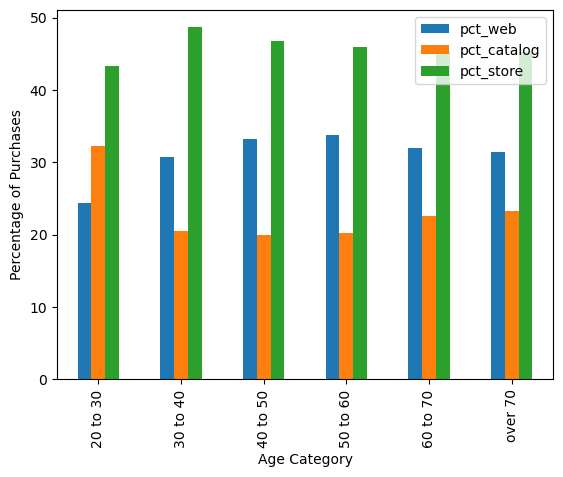

In [53]:
age_plot.plot(kind='bar', ylabel = 'Percentage of Purchases', xlabel = 'Age Category')


Above are the percentage of each method of purchase organized by age groups. As we saw with the income data, in-store is the main way customers purchase goods from this store. We've discussed marketing strategies catering towards the local demographic. Surprisingly, catalog sales within the 20-30 age range make up a higher percentage of purchases per age group than in any other age group. The store can market accordingly, maybe pushing new-world wines and unique, non-traditional cheese blends in their catalog. 

Now let's observe the counts of actual purchases per age group per method of purchase.

<AxesSubplot:xlabel='age_groups'>

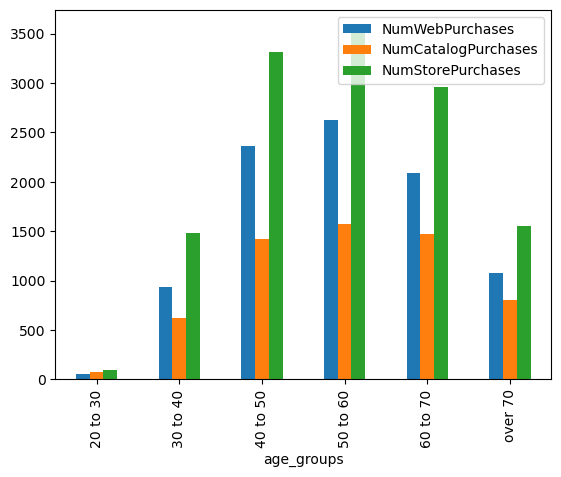

In [30]:
age_graph.plot(kind='bar')

The largest demographic of the store by count is 50-60 year olds, then 40-50, then 60-70. The average consumer is middle age or slightly older. Hiring staff of a similar age can increase relatability and shared taste in products as the customers and therefore increase profits. Further marketing tactics to the store's discretion can be explored upon analyzing their age demographic.

This concludes my project. Thank you for reading!